<a href="https://colab.research.google.com/github/500081/M7DataSP/blob/main/DU_week_10_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Pipeline

<a href="https://colab.research.google.com/github/simecek/dspracticum2023/blob/main/lesson10/ds_practicum_ex_ml_pipeline_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset `titanic`: https://www.kaggle.com/competitions/titanic/data

Dataset `spaceship-titanic`: https://www.kaggle.com/competitions/spaceship-titanic/data

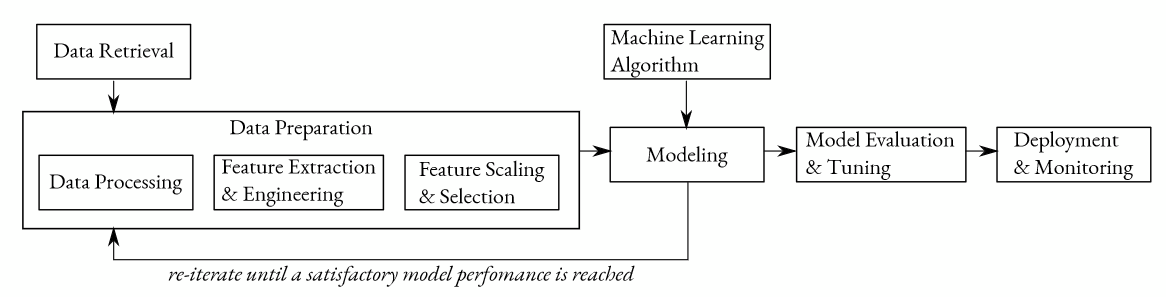

Zvolili jsme dataset spaceship-titanic, na kterém jsme vytvořili neuronovou síť se třemi vrstvami. \
V rámci preprocessingu bylo nutné vyřešit duplikáty, doplnit chybějící data, vytvořit dummy proměnné pro faktorová data a přeškálovat numerické proměnné. \
Model se snaží predikovat proměnnou Transported, tedy jestli byl pasažér úspěšně transportován do jiné dimenze, pomocí HomePlanet_Earth,  Age, CryoSleep_True, RoomService, FoodCourt, Spa, VRDeck. \
Model má tři vrstvy, všechny jsou Fully Connected, na vstupní vrstvě je 7 neuronů, stejně jako proměnných, které v modelu používáme, ve skryté vrstvě je 49 neuronů a ve výstupní vrstvě jsou 2 neurony. Úspěšnost modelu vychází kolem 0.795. \
Analýza významnosti proměnných nám vyšla pro většinu z nich záporně, nejspíš je to spůsobeno skrytou vrstvou. Model ale dosahuje dobré úspěšnosti a proměnné využité v modelu byly voleny na základě výsledků lineární regrese. Proto jsme je dál neměnili.  

Download the dataset:

In [5]:
import os

os.environ['KAGGLE_USERNAME'] = 'amllogin'
os.environ['KAGGLE_KEY'] = '35eca611ac64064016cba986e2161cdd'

######################################################
# TODO: choose a dataset - Titanic or Space Titanic: #
######################################################
# DATASET = 'titanic'
DATASET = 'spaceship-titanic'

!kaggle competitions download -c {DATASET} -p {'.'}

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 112MB/s]


In [6]:
import zipfile

dataset_path = '/content/data_preparation_exercise/'


with zipfile.ZipFile(DATASET + '.zip', 'r') as zip_ref:
    zip_ref.extractall(dataset_path)

In [7]:
import pandas as pd

csv_filepath = dataset_path + 'train.csv'
df = pd.read_csv(csv_filepath)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


## 0. Data Exploration


In [8]:
######################################
# TODO: get insights to your dataset #
######################################

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


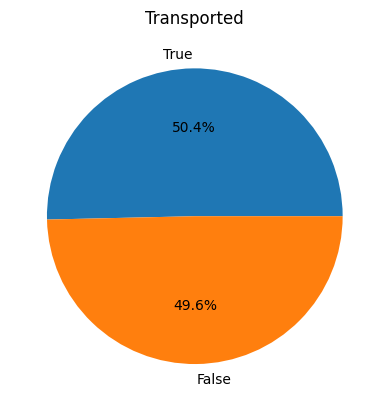

In [10]:
import matplotlib.pyplot as plt

plt.pie(df['Transported'].value_counts().values, labels=df['Transported'].value_counts().index, autopct='%.1f%%')
plt.title('Transported')
plt.show()

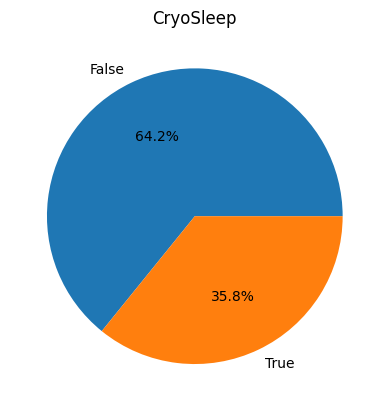

In [11]:
import matplotlib.pyplot as plt

plt.pie(df['CryoSleep'].value_counts().values, labels=df['CryoSleep'].value_counts().index, autopct='%.1f%%')
plt.title('CryoSleep')
plt.show()

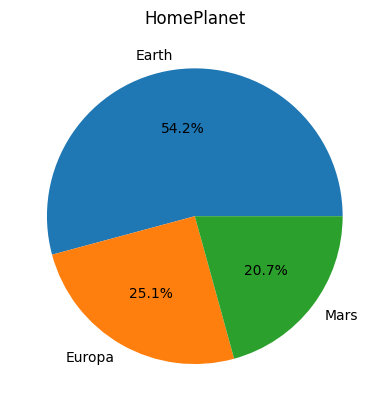

In [12]:
plt.pie(df['HomePlanet'].value_counts().values, labels=df['HomePlanet'].value_counts().index, autopct='%.1f%%')
plt.title('HomePlanet')
plt.show()

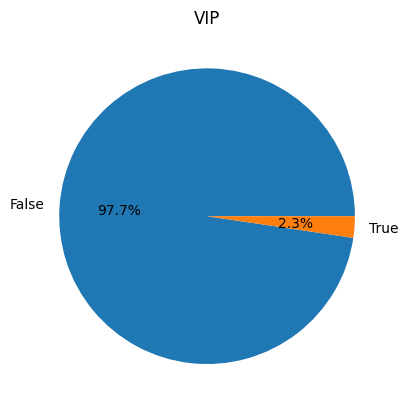

In [13]:
plt.pie(df['VIP'].value_counts().values, labels=df['VIP'].value_counts().index, autopct='%.1f%%')
plt.title('VIP')
plt.show()

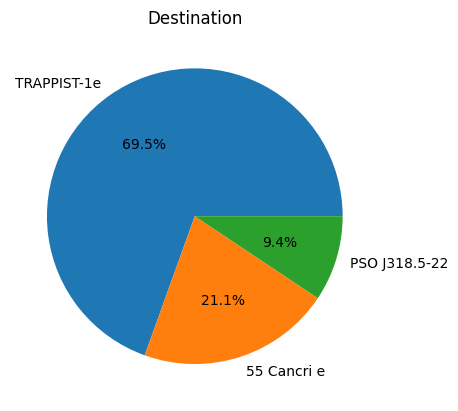

In [14]:
plt.pie(df['Destination'].value_counts().values, labels=df['Destination'].value_counts().index, autopct='%.1f%%')
plt.title('Destination')
plt.show()

## 1. Data Cleaning

In [15]:
###########################
# TODO: handle duplicates #
###########################

df.loc[df.duplicated()]
df.loc[df.duplicated(['PassengerId'])]
df.loc[df.duplicated(["Name"])]


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
58,0064_01,Mars,True,F/14/S,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
65,0069_01,Earth,False,F/16/S,TRAPPIST-1e,42.0,False,887.0,0.0,9.0,6.0,0.0,NaN,True
77,0082_03,Mars,False,F/16/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
101,0108_02,Earth,False,G/19/S,TRAPPIST-1e,31.0,False,562.0,0.0,326.0,0.0,0.0,NaN,False
126,0136_01,Earth,False,G/23/S,PSO J318.5-22,47.0,False,97.0,418.0,126.0,25.0,55.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8629,9205_02,Europa,True,B/300/P,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
8631,9208_01,Earth,True,G/1485/S,TRAPPIST-1e,35.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
8636,9218_01,Europa,True,B/353/S,55 Cancri e,43.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
8652,9230_01,Europa,False,C/342/S,TRAPPIST-1e,36.0,True,0.0,5600.0,715.0,2868.0,971.0,NaN,True


<Axes: >

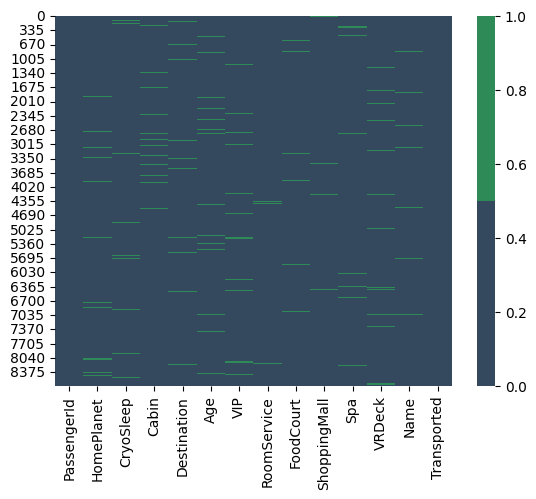

In [16]:
#############################
# TODO: handle missing data #
#############################
import seaborn as sns
df2 = df.copy()
colours = ['#34495E', 'seagreen']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))


In [17]:
len(df)

8693

In [18]:
df.dropna(subset=["CryoSleep"], inplace=True)
df.dropna(subset=["HomePlanet"], inplace=True)

df['RoomService']=df['RoomService'].fillna(df['RoomService'].mean())
df['FoodCourt']=df['FoodCourt'].fillna(df['FoodCourt'].mean())
df["Spa"]=df["Spa"].fillna(df["Spa"].mean())
df["VRDeck"]=df["VRDeck"].fillna(df["VRDeck"].mean())
df["Age"]=df["Age"].fillna(df["Age"].mean())


<Axes: >

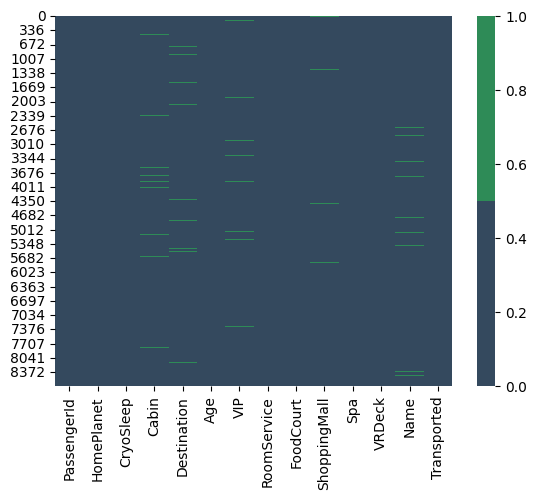

In [19]:
colours = ['#34495E', 'seagreen']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

In [20]:
len(df)

8277

## 2. Feature manipulation

#### Categorical features encoding:

(`object` type from `df.info()`)

In [21]:
df_transformed = df.copy()

In [22]:
#####################################
# TODO: encode categorical features #
#####################################

from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

# custom one hot encoder that just directly assigns correct names to columns
class OneHotEncoderWithColNames(BaseEstimator, TransformerMixin):
    def __init__(self, **kwargs):
        self.feature_names = []

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        result = pd.get_dummies(X)
        print(result.columns)
        self.feature_names = result.columns
        return result

In [23]:
ohe_status = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_status_df = pd.DataFrame(ohe_status.fit_transform(df_transformed[['CryoSleep']]))
df_transformed = df_transformed.join(ohe_status_df)


Index(['CryoSleep_False', 'CryoSleep_True'], dtype='object')


In [24]:
ohe_status = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_status_df = pd.DataFrame(ohe_status.fit_transform(df_transformed[['HomePlanet']]))
df_transformed = df_transformed.join(ohe_status_df)

Index(['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars'], dtype='object')


#### Numerical feature scaling:

In [25]:
##################################
# TODO: scale numerical features #
##################################

numerical_features = df.select_dtypes(include='number').columns.tolist()
numerical_features

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [26]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler(copy=True)
df_transformed.loc[:,numerical_features] = standard_scaler.fit_transform(df_transformed[numerical_features])
df_transformed.loc[:,numerical_features]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.708507,-0.340203,-0.286986,-0.287125,-0.277582,-0.267948
1,-0.338651,-0.175631,-0.281411,-0.246147,0.207196,-0.229360
2,2.034907,-0.275280,1.928402,-0.287125,5.651902,-0.224975
3,0.289643,-0.340203,0.507853,0.320986,2.661994,-0.098690
4,-0.897136,0.117275,-0.243620,-0.039619,0.221324,-0.266194
...,...,...,...,...,...,...
8688,0.848128,-0.340203,3.937492,-0.287125,1.173221,-0.203051
8689,-0.757514,-0.340203,-0.286986,-0.287125,-0.277582,-0.267948
8690,-0.199030,-0.340203,-0.286986,2.781296,-0.276699,-0.267948
8691,0.219833,-0.340203,0.362886,-0.287125,0.034124,2.569093


In [27]:
# df_transformed.corr()

## 5. Splitting data to train and test sets (dataset sampling)

In [28]:
#########################################################################
# TODO: split the data to train and test sets (the real test set is not #
# available for us before submission)                                   #
# for 'titanic' dataset, we are predicting the 'Survived' column,       #
# for 'spaceship-titanic' the 'Transported' column                      #
#########################################################################

X = df_transformed[["HomePlanet_Earth",  "Age", "CryoSleep_True", "RoomService", "FoodCourt", "Spa", "VRDeck"]].values
Y = df_transformed['Transported'].values

In [29]:
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    train_size=7000,
                                                    test_size=1277)
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{False: 3479, True: 3521}

In [30]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{False: 628, True: 649}

## 6. Model

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F

x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [32]:
#############################################################################
# TODO: propose some appropriate solution and give reasoning why it is      #
# suitable to be used here (+ discuss at least one other approach you could #
# have taken instead) and train the model                                   #
# - try to reach 80%+ accuracy on your test set                             #
#############################################################################

class ANN(nn.Module):
   def __init__(self, input_dim):
       super().__init__()
       self.fc1 = nn.Linear(in_features=input_dim, out_features=49)
       self.fc2 = nn.Linear(in_features=49, out_features=49)
       self.output = nn.Linear(in_features = 49, out_features=2)

   def forward(self, x):
     x = F.relu(self.fc1(x))
     x = F.relu(self.fc2(x))
     x = F.softmax(self.output(x))
     return x

In [33]:
model = ANN(x_train.shape[1])
model
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [34]:
model

ANN(
  (fc1): Linear(in_features=7, out_features=49, bias=True)
  (fc2): Linear(in_features=49, out_features=49, bias=True)
  (output): Linear(in_features=49, out_features=2, bias=True)
)

In [103]:
epochs = 100
loss_arr = []
for i in range(epochs):
   y_hat = model.forward(x_train)
   loss = criterion(y_hat, y_train)
   loss_arr.append(loss)
   optimizer.zero_grad()
   loss.backward()
   optimizer.step()

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [104]:
preds = []
with torch.no_grad():
   for val in x_test:
       y_hat = model.forward(val)
       preds.append(y_hat.argmax().item())

df = pd.DataFrame({'Y': y_test, 'YHat': preds})
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]

df['Correct'].sum() / len(df)

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


0.7940485512920908

## 7. Interpretation

In [81]:
##############################################################################
# TODO: interpret your model - describe what are the most important features #
# for its decisions                                                          #
##############################################################################

In [35]:
pip install captum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.6 MB/s eta 0:00:00


In [36]:
import torch
from captum.attr import IntegratedGradients

model.eval()
ig = IntegratedGradients(model)
attributions, delta = ig.attribute(x_test, target=0, return_convergence_delta=True)

#attributions - příspěvky každé proměnné pro každý vstup


<ipython-input-32-65c23a5ac40f>:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.output(x))


In [84]:
attributions.size()

torch.Size([1277, 7])

In [37]:
average_vector = torch.mean(attributions, dim=0)

print(average_vector)
average_vector.size()


tensor([-0.0008,  0.0002, -0.0029, -0.0031, -0.0055, -0.0011, -0.0030],
       dtype=torch.float64)


torch.Size([7])